# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science


## Lab X: Review and Random Topics

**Harvard University**<br/>
**Fall 2019**<br/>
**Authors:** Rylan Schaeffer, Kevin Rader, Chris Gumb

---

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)  # You should see a 2.0.0 here!

2.0.0


## Table of Contents
<ol start="0">
    <li>Reminder: Code Effectively!</li>
    <li>Rylan's Summary of the Course</li>
    <li>Concepts to Clarify</li>
    <li>Neural Networks</li>  
    <li>Rylan's Experience as a Data Scientist at Uber</li>  
</ol>

## Reminder: Code Effectively


- When debugging, **read the error message** at the bottom and work your way up
    - Error messages can sometimes be difficult to interpret for a beginner
    - But error messages tells you exactly what failed and why. From this, you can work backwards

- Use keyboard shortcuts.
    - Help you move faster, spend less energy on slow aspects
    - If you can't remember them, go to the top "Help" then "Keyboard Shortcuts"
    - Some of my favorites:
        - Add cell above: a
        - Add cell below: b
        - Delete current cell: dd
        - Autocomplete code: tab
        - Show documentation for a function: shift + tab
        - Change cell to Markdown: m
        - Change cell to Code: y
    - If you use an IDE (RStudio, PyCharm, Spyder, etc) or a web browser (Firefox, Chrome, Safari, IE), those have keyboard shortcuts too

- Don't place large blocks of code in single cell/function. Use cells/functions liberally!
    - Makes debugging & rerunning much easier!
    
**Saving a second may seem unimportant, but if you sum those seconds up, you'll get back significant time on your life**

## Rylan's Summary of the Course

In this class, we've covered linear regression, logistic regression, classification and regression trees, bagging, boosting, random forests, neural networks, cross validation, regularization (e.g. LASSO, ridge), PCA and more! How do they all fit together?

In general, one central goal of data science is to relate different random variables to one another. For example, in classification, we might want to predict the likely class (e.g. obesity) for specific predictors (e.g. height and weight). A mathematical relationship between variables is a model, and we've seen several of these:

Models:
    - Linear Regression
    - Logistic Regression
    - Classification/Regression Trees
    - Neural Networks

These models are mathematical relationships between random variables. For instance, linear regression posits that some variable $y$ is a linear transformation of input features $x$:

\begin{align*}
  \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
\end{align*}

One central problem is that if our model is too "simple" then it will miss out on useful signals (underfit), but that if our model is too "complex" then it will pick up on training-data specific signals (overfit).

![](../img/train_test_error.png)

### How do we find the Goldilocks zone of the best fit?

Two general approaches

    1. Start with complex models and limit their complexity
    2. Start with simple models and add complexity        

### Approach 1: Start complex, go simple

    - Use a single model but give it a resource budget
        - Penalize the sum of fit parameters squared (e.g. regression with Ridge regularization)
        - Penalize the sum of absolute value of fit parameters (e.g. regression with LASSO regularization)
    - Measure how well a model performs on non-training data
        - Fit a model multiple times on different subsets of training data (e.g. K-fold Cross Validation)
    - Ensemble many models, but hamstring each model
        - Each model sees all features but only a subset of data points (e.g. bagging with trees)
        - Each model sees only a subset of features but all data points (e.g. random forest)
    - These are not mutually exclusive! We can use cross validation to determine hyperparameters

### Approach 2: Start simple, go complex

    - Iteratively fit simple models, correcting for the mistakes of the previous models (e.g. boosting)
    - Ensemble many models, but hamstring each model (different view)

### Other benefits (e.g. Feature Importance)

These techniques also provide other benefits! For instance, suppose we want to know which features are most important. If we give a single model a resource budget (e.g. linear regression with ridge regularization) or if we give many models only a subset of data points (bagging with trees), we can ask which features are prioritized by the single model or by the ensemble of models. This information can be used to make better models or improve understanding of the data being studied.

## Concepts to Clarify


### Never use test data to fit models or choose hyperparameters

Test data provides a final estimate of how well your model will generalize. Choosing your model or its hyperparameters using test data defeats the purpose of separating training data from testing data!

### Based on the number of samples and number of features, is there a rule of thumb how choose the right model and the right complexity, or is the answer solely experimental?

Both. There are settings in which certain models will do well (and do poorly), and when you recognize that you're in such a setting, you should leverage that knowledge to choose the right model. But in general, you will not know and the answer will be largely empiric.

Three classification examples from [sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html):

![](../img/classifier_comparison.png)

#### Concept Check: For each of the above three datasets, how would you expect logistic regression to perform?



### What is the difference between LASSO and Ridge regularization, specifically regarding variable selection?

Both are techniques to penalize model complexity by giving the model a limit budget over the input features. Mathematically, this takes the form of a penalty term in the loss function that depends on the parameters of the model.


For example, in linear regression, we wanted to find parameters $\boldsymbol{\beta}$ that minimizes the following error:

\begin{align*}
  L(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^n \|y_i - \boldsymbol{\beta}^T \mathbf{x}_i\|^2.
\end{align*}

In linear regression with ridge regularization, we penalize the sum of the squares of the parameters:

\begin{align*}
  L_{\text{ridge}}(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^n \|y_i - \boldsymbol{\beta}^T \mathbf{x}_i\|^2 + \lambda \sum_{j=1}^m \beta_{j}^{2}.
\end{align*}

In linear regression with LASSO regularization, we penalize the sum of the absolute values of the parameters:

\begin{align*}
  L_{\text{LASSO}}(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^n \|y_i - \boldsymbol{\beta}^T \mathbf{x}_i\|^2 + \lambda \sum_{j=1}^m |\beta_j|.
\end{align*}

**But how do these two regularization approaches actually differ in terms of the parameters?**

![](../img/ridge_lasso_regularization.png)

LASSO regularization will find sparser parameters (i.e. more parameters will be set to 0) than Ridge regularization.

### What is the curse of dimensionality? Why is it a curse?

The curse of dimensionality refers to the property that as the number of your features increases, the density of your data typically increases much more slowly than the total volume of the dimensionality. This means your data becomes incredibly sparse and model fitting becomes hard.

Aside: Human intution acquired from living in a low dimensional world is woefully inadequate for understanding high dimensions. Strange phenomena can occur that are perfectly reasonable in 100 dimensions that are nonsensical in 3 dimensions.

### What is the bias-variance tradeoff? Why does such a tradeoff necessarily exist?

Intution: from [Andrew Gelman, Professor of Statistics, Director of Applied Statistics Center at Columbia University](https://statmodeling.stat.columbia.edu/2011/10/15/the-bias-variance-tradeoff/):

"The basic idea is as follows: if you’re estimating something, you can slice your data finer and finer, or perform more and more adjustments, each time getting a purer—and less biased—estimate. But each subdivision or each adjustment reduces your sample size or increases potential estimation error, hence the variance of your estimate goes up.

That story is real. In lots and lots of examples, there’s a continuum between a completely unadjusted general estimate (high bias, low variance) and a specific, focused, adjusted estimate (low bias, high variance).

Suppose, for example, you’re using data from a large experiment to estimate the effect of a treatment on a fairly narrow group, say, white men between the ages of 45 and 50. At one extreme, you could just take the estimated treatment effect for the entire population, which could have high bias (to the extent the effect varies by age, sex, and ethnicity) but low variance (because you’re using all the data). At the other extreme, you could form an estimate using only data from the group in question, which would then be unbiased (assuming an appropriate experimental design) but would have a high variance."


### How can trees be used for classification and regression (at the same time)?

As far as I know, trees typically aren't used for both *simultaneously*. However, trees can certainly be used for classification and regression separately. How do the two settings differ? They are both the same in that trees carve the feature space up using a splitting criterion (e.g. cross entropy for classification, variance reduction for regression) and then at each leaf, a simple model is fit. For `sklearn.tree.DecisionTreeRegressor`, the simple model is the mean of training data that falls into that particular leaf:

See [sklearn documentation](https://scikit-learn.org/stable/modules/tree.html)

![](../img/regression_tree.png)

## Neural Networks

What is a neural network? There are many different viewpoints. One viewpoint is the neuroscience-inspired pictoral representation:

![](../img/neural_network.png)


A slightly more mathematical viewpoint is that a neural network is a **composite** (i.e. sequence of chained functions), **parametric** (i.e. having parameters) function comprised of two types of **repeating**, **alternating** functions:
    1. Affine transformation:
    
$$h_l = W_l x_{l-1} + b_l$$
    
    2. Element-wise nonlinearities
    
$$x_l = \sigma (h_l) = \frac{1}{1 + e^{-h_l}}$$

Here, $l$ denotes the layer with $L$ total layers. We say that the neural network is a parametric function because it depends on all the parameters $\{W_1, b_1, W_2, b_2, ..., W_L, b_L \}$.


To see why this is a **composite** function, let's explicitly write out the sequence of chained functions:


\begin{align*}
\hat{y} &= NN(x)\\
&= \underbrace{W_L \underbrace{\sigma(W_{L-1} \sigma (\underbrace{... \underbrace{\sigma(W_2 \underbrace{\sigma(W_1 x + b_1)}_{\text{1st layer}} + b_2)}_{\text{2nd layer}} + ...)}_{\vdots} + b_{L-1})}_{\text{L-1 layer}} + b_L}_{\text{L layer}}
\end{align*}

Let's do some exercises! Suppose we want to predict $y$ given $x$, where the data is generated via $y = x \sin x$:

x_in_batch_form shape:  (100, 1)


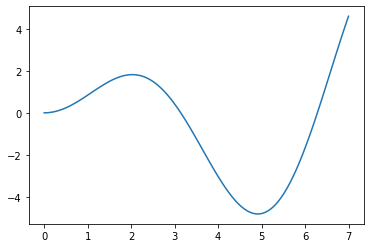

In [3]:
batch_size = 100
x = np.linspace(0, 7, batch_size)
x_in_batch_form = x.reshape(batch_size, 1)
print('x_in_batch_form shape: ', x_in_batch_form.shape)
y = np.multiply(x, np.sin(x))
plt.plot(x, y)

#### Exercise 1: Suppose we fit a single layer neural network (i.e. no hidden layers) with no non-linear activation function. What will our model learn?

In [4]:
# create a single layer neural network with no activation function

single_layer_linear_network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
])
single_layer_linear_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
# train the neural network

single_layer_linear_network.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())
single_layer_linear_network.fit(x_in_batch_form, y, epochs=100, batch_size=batch_size)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 3ms/sample - loss: 38.9397
Epoch 2/100
100/100 [==============================] - 0s 12us/sample - loss: 20.0249
Epoch 3/100
100/100 [==============================] - 0s 12us/sample - loss: 11.8704
Epoch 4/100
100/100 [==============================] - 0s 21us/sample - loss: 8.3541
Epoch 5/100
100/100 [==============================] - 0s 13us/sample - loss: 6.8370
Epoch 6/100
100/100 [==============================] - 0s 19us/sample - loss: 6.1817
Epoch 7/100
100/100 [==============================] - 0s 9us/sample - loss: 5.8978
Epoch 8/100
100/100 [==============================] - 0s 9us/sample - loss: 5.7741
Epoch 9/100
100/100 [==============================] - 0s 9us/sample - loss: 5.7193
Epoch 10/100
100/100 [==============================] - 0s 28us/sample - loss: 5.6944
Epoch 11/100
100/100 [==============================] - 0s 21us/sample - loss: 5.6823
Epoch 12/100
100/100 [=====================

Epoch 97/100
100/100 [==============================] - 0s 25us/sample - loss: 5.5367
Epoch 98/100
100/100 [==============================] - 0s 23us/sample - loss: 5.5357
Epoch 99/100
100/100 [==============================] - 0s 22us/sample - loss: 5.5347
Epoch 100/100
100/100 [==============================] - 0s 34us/sample - loss: 5.5337


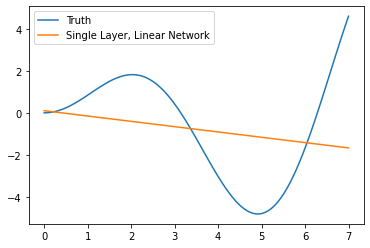

In [6]:
# plot the neural network's predictions

single_layer_linear_network_yhat = single_layer_linear_network.predict(x_in_batch_form)
plt.plot(x, y, label='Truth')
plt.plot(x, single_layer_linear_network_yhat, label='Single Layer, Linear Network')
plt.legend()

The key takeaway: a single layer, linear neural network trained under mean squared error is just linear regression! Why is this? Written mathemtically, our prediction is just

$$\hat{y} = Wx + b $$

which is clearly linear regression!

#### Exercise 2: Suppose we fit a deep neural network (i.e. multiple hidden layers) with no non-linear activation functions. What will our model learn?

In [7]:
# create a multiple layer neural network with no activation functions

multiple_layer_linear_network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(10),  # arbitrarily chosen, doesn't matter
    tf.keras.layers.Dense(1),
])
multiple_layer_linear_network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train the neural network

multiple_layer_linear_network.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())
multiple_layer_linear_network.fit(x_in_batch_form, y, epochs=100, batch_size=batch_size)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 2ms/sample - loss: 20.8815
Epoch 2/100
100/100 [==============================] - 0s 12us/sample - loss: 8.3389
Epoch 3/100
100/100 [==============================] - 0s 13us/sample - loss: 6.2247
Epoch 4/100
100/100 [==============================] - 0s 21us/sample - loss: 5.7328
Epoch 5/100
100/100 [==============================] - 0s 26us/sample - loss: 5.5843
Epoch 6/100
100/100 [==============================] - 0s 13us/sample - loss: 5.5431
Epoch 7/100
100/100 [==============================] - 0s 13us/sample - loss: 5.5317
Epoch 8/100
100/100 [==============================] - 0s 21us/sample - loss: 5.5273
Epoch 9/100
100/100 [==============================] - 0s 24us/sample - loss: 5.5246
Epoch 10/100
100/100 [==============================] - 0s 40us/sample - loss: 5.5222
Epoch 11/100
100/100 [==============================] - 0s 15us/sample - loss: 5.5199
Epoch 12/100
100/100 [====================

Epoch 97/100
100/100 [==============================] - 0s 24us/sample - loss: 5.4396
Epoch 98/100
100/100 [==============================] - 0s 44us/sample - loss: 5.4394
Epoch 99/100
100/100 [==============================] - 0s 20us/sample - loss: 5.4391
Epoch 100/100
100/100 [==============================] - 0s 19us/sample - loss: 5.4389


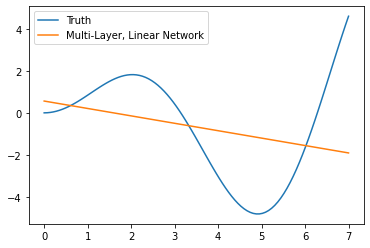

In [9]:
# plot the neural network's predictions

multiple_layer_linear_network_yhat = multiple_layer_linear_network.predict(x_in_batch_form)
plt.plot(x, y, label='Truth')
plt.plot(x, multiple_layer_linear_network_yhat, label='Multi-Layer, Linear Network')
plt.legend()

The key takeaway: a multi-layer, linear neural network trained under mean squared error is still just linear regression! The reason why is simple: two chained affine transformations is still an affine transformations

\begin{align*}
W_2(W_1 x + b_1) + b_2
&= \underbrace{W_2 W_1}_{W_1'} x + \underbrace{W_2 b_1 + b_2}_{b_1'}\\
&= W_1' x + b_1'
\end{align*}

Nonlinear activation functions are needed to permit neural networks to learn nonlinear functions!

#### Exercise 3: Suppose we fit a single layer neural network (i.e. no hidden layers) with a sigmoid activation functions. What will our model learn?

In [10]:
# create a single layer neural network with Sigmoid activation function

single_layer_nonlinear_network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='sigmoid'),
])
single_layer_nonlinear_network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train the neural network

single_layer_nonlinear_network.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())
single_layer_nonlinear_network.fit(x_in_batch_form, y, epochs=100, batch_size=batch_size)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 2ms/sample - loss: 8.2062
Epoch 2/100
100/100 [==============================] - 0s 33us/sample - loss: 8.1696
Epoch 3/100
100/100 [==============================] - 0s 20us/sample - loss: 8.1287
Epoch 4/100
100/100 [==============================] - 0s 30us/sample - loss: 8.0831
Epoch 5/100
100/100 [==============================] - 0s 21us/sample - loss: 8.0323
Epoch 6/100
100/100 [==============================] - 0s 18us/sample - loss: 7.9759
Epoch 7/100
100/100 [==============================] - 0s 35us/sample - loss: 7.9137
Epoch 8/100
100/100 [==============================] - 0s 15us/sample - loss: 7.8457
Epoch 9/100
100/100 [==============================] - 0s 17us/sample - loss: 7.7722
Epoch 10/100
100/100 [==============================] - 0s 14us/sample - loss: 7.6938
Epoch 11/100
100/100 [==============================] - 0s 13us/sample - loss: 7.6117
Epoch 12/100
100/100 [=====================

100/100 [==============================] - 0s 29us/sample - loss: 6.4097
Epoch 97/100
100/100 [==============================] - 0s 31us/sample - loss: 6.4093
Epoch 98/100
100/100 [==============================] - 0s 19us/sample - loss: 6.4088
Epoch 99/100
100/100 [==============================] - 0s 56us/sample - loss: 6.4083
Epoch 100/100
100/100 [==============================] - 0s 32us/sample - loss: 6.4079


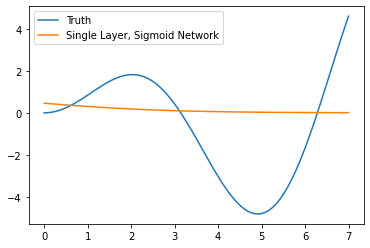

In [12]:
# plot the neural network's predictions

single_layer_nonlinear_network_yhat = single_layer_nonlinear_network.predict(x_in_batch_form)
plt.plot(x, y, label='Truth')
plt.plot(x, single_layer_nonlinear_network_yhat, label='Single Layer, Sigmoid Network')
plt.legend()

Although not immediately obvious, this is actually logistic regression! Let's plot the predictions from the network over a wider range of x values:

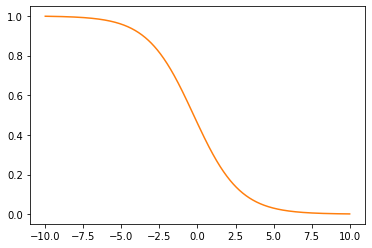

In [13]:
x_wider = np.linspace(-10, 10, 1000).reshape(1000, 1)
single_layer_nonlinear_network_yhat_wider = single_layer_nonlinear_network.predict(x_wider)
# plt.plot(x, y, label='Truth')
plt.plot(x_wider, single_layer_nonlinear_network_yhat_wider, color='tab:orange', label='Single Layer, Sigmoid Network')

Key takeaway: a single layer neural network with a sigmoid activation function is logistic regression! Mathematically, this makes sense:

$$NN(x) = \sigma(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} $$

#### Exercise 4: Suppose we permit a hidden layer with sigmoid activation functions. What will our model learn as a function of the hidden layer dimension?

In [14]:
# create many neural network with Sigmoid activation function

dims_to_consider = [1, 10, 50, 100]
single_hidden_results = {}

for dim_to_consider in dims_to_consider:
    hidden_layer_nonlinear_network = tf.keras.models.Sequential([
        tf.keras.layers.Dense(dim_to_consider, input_shape=(1,), activation='sigmoid'),
        tf.keras.layers.Dense(dim_to_consider, activation='sigmoid'),
        tf.keras.layers.Dense(1,),
    ])
    hidden_layer_nonlinear_network.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())
    hidden_layer_nonlinear_network.fit(x_in_batch_form, y, epochs=500, batch_size=batch_size)
    single_hidden_results[dim_to_consider] = hidden_layer_nonlinear_network.predict(x_in_batch_form)
    

Train on 100 samples
Epoch 1/200
100/100 [==============================] - 0s 2ms/sample - loss: 5.8505
Epoch 2/200
100/100 [==============================] - 0s 20us/sample - loss: 5.8470
Epoch 3/200
100/100 [==============================] - 0s 12us/sample - loss: 5.8436
Epoch 4/200
100/100 [==============================] - 0s 15us/sample - loss: 5.8405
Epoch 5/200
100/100 [==============================] - 0s 14us/sample - loss: 5.8375
Epoch 6/200
100/100 [==============================] - 0s 15us/sample - loss: 5.8347
Epoch 7/200
100/100 [==============================] - 0s 11us/sample - loss: 5.8320
Epoch 8/200
100/100 [==============================] - 0s 36us/sample - loss: 5.8294
Epoch 9/200
100/100 [==============================] - 0s 21us/sample - loss: 5.8270
Epoch 10/200
100/100 [==============================] - 0s 17us/sample - loss: 5.8247
Epoch 11/200
100/100 [==============================] - 0s 29us/sample - loss: 5.8225
Epoch 12/200
100/100 [=====================

100/100 [==============================] - 0s 33us/sample - loss: 5.7359
Epoch 97/200
100/100 [==============================] - 0s 16us/sample - loss: 5.7351
Epoch 98/200
100/100 [==============================] - 0s 14us/sample - loss: 5.7343
Epoch 99/200
100/100 [==============================] - 0s 16us/sample - loss: 5.7335
Epoch 100/200
100/100 [==============================] - 0s 17us/sample - loss: 5.7327
Epoch 101/200
100/100 [==============================] - 0s 16us/sample - loss: 5.7319
Epoch 102/200
100/100 [==============================] - 0s 17us/sample - loss: 5.7311
Epoch 103/200
100/100 [==============================] - 0s 16us/sample - loss: 5.7303
Epoch 104/200
100/100 [==============================] - 0s 19us/sample - loss: 5.7295
Epoch 105/200
100/100 [==============================] - 0s 17us/sample - loss: 5.7287
Epoch 106/200
100/100 [==============================] - 0s 19us/sample - loss: 5.7279
Epoch 107/200
100/100 [==============================] - 0s 

Epoch 191/200
100/100 [==============================] - 0s 17us/sample - loss: 5.6549
Epoch 192/200
100/100 [==============================] - 0s 22us/sample - loss: 5.6540
Epoch 193/200
100/100 [==============================] - 0s 13us/sample - loss: 5.6531
Epoch 194/200
100/100 [==============================] - 0s 22us/sample - loss: 5.6522
Epoch 195/200
100/100 [==============================] - 0s 15us/sample - loss: 5.6513
Epoch 196/200
100/100 [==============================] - 0s 14us/sample - loss: 5.6503
Epoch 197/200
100/100 [==============================] - 0s 17us/sample - loss: 5.6494
Epoch 198/200
100/100 [==============================] - 0s 20us/sample - loss: 5.6485
Epoch 199/200
100/100 [==============================] - 0s 14us/sample - loss: 5.6475
Epoch 200/200
100/100 [==============================] - 0s 15us/sample - loss: 5.6466
Train on 100 samples
Epoch 1/200
100/100 [==============================] - 0s 2ms/sample - loss: 7.2895
Epoch 2/200
100/100 [====

Epoch 87/200
100/100 [==============================] - 0s 20us/sample - loss: 5.6881
Epoch 88/200
100/100 [==============================] - 0s 16us/sample - loss: 5.6831
Epoch 89/200
100/100 [==============================] - 0s 16us/sample - loss: 5.6783
Epoch 90/200
100/100 [==============================] - 0s 17us/sample - loss: 5.6734
Epoch 91/200
100/100 [==============================] - 0s 17us/sample - loss: 5.6686
Epoch 92/200
100/100 [==============================] - 0s 13us/sample - loss: 5.6639
Epoch 93/200
100/100 [==============================] - 0s 16us/sample - loss: 5.6591
Epoch 94/200
100/100 [==============================] - 0s 16us/sample - loss: 5.6545
Epoch 95/200
100/100 [==============================] - 0s 18us/sample - loss: 5.6498
Epoch 96/200
100/100 [==============================] - 0s 18us/sample - loss: 5.6452
Epoch 97/200
100/100 [==============================] - 0s 17us/sample - loss: 5.6407
Epoch 98/200
100/100 [==============================] 

Epoch 182/200
100/100 [==============================] - 0s 19us/sample - loss: 5.3611
Epoch 183/200
100/100 [==============================] - 0s 18us/sample - loss: 5.3588
Epoch 184/200
100/100 [==============================] - 0s 23us/sample - loss: 5.3565
Epoch 185/200
100/100 [==============================] - 0s 21us/sample - loss: 5.3542
Epoch 186/200
100/100 [==============================] - 0s 18us/sample - loss: 5.3519
Epoch 187/200
100/100 [==============================] - 0s 19us/sample - loss: 5.3496
Epoch 188/200
100/100 [==============================] - 0s 31us/sample - loss: 5.3474
Epoch 189/200
100/100 [==============================] - 0s 31us/sample - loss: 5.3452
Epoch 190/200
100/100 [==============================] - 0s 31us/sample - loss: 5.3430
Epoch 191/200
100/100 [==============================] - 0s 20us/sample - loss: 5.3408
Epoch 192/200
100/100 [==============================] - 0s 38us/sample - loss: 5.3386
Epoch 193/200
100/100 [====================

Epoch 78/200
100/100 [==============================] - 0s 10us/sample - loss: 5.3732
Epoch 79/200
100/100 [==============================] - 0s 15us/sample - loss: 5.3694
Epoch 80/200
100/100 [==============================] - 0s 13us/sample - loss: 5.3657
Epoch 81/200
100/100 [==============================] - 0s 13us/sample - loss: 5.3620
Epoch 82/200
100/100 [==============================] - 0s 13us/sample - loss: 5.3585
Epoch 83/200
100/100 [==============================] - 0s 14us/sample - loss: 5.3549
Epoch 84/200
100/100 [==============================] - 0s 17us/sample - loss: 5.3514
Epoch 85/200
100/100 [==============================] - 0s 17us/sample - loss: 5.3480
Epoch 86/200
100/100 [==============================] - 0s 12us/sample - loss: 5.3447
Epoch 87/200
100/100 [==============================] - 0s 13us/sample - loss: 5.3414
Epoch 88/200
100/100 [==============================] - 0s 15us/sample - loss: 5.3381
Epoch 89/200
100/100 [==============================] 

Epoch 173/200
100/100 [==============================] - 0s 12us/sample - loss: 5.1903
Epoch 174/200
100/100 [==============================] - 0s 15us/sample - loss: 5.1894
Epoch 175/200
100/100 [==============================] - 0s 13us/sample - loss: 5.1885
Epoch 176/200
100/100 [==============================] - 0s 11us/sample - loss: 5.1877
Epoch 177/200
100/100 [==============================] - 0s 11us/sample - loss: 5.1869
Epoch 178/200
100/100 [==============================] - 0s 12us/sample - loss: 5.1860
Epoch 179/200
100/100 [==============================] - 0s 14us/sample - loss: 5.1852
Epoch 180/200
100/100 [==============================] - 0s 15us/sample - loss: 5.1844
Epoch 181/200
100/100 [==============================] - 0s 14us/sample - loss: 5.1836
Epoch 182/200
100/100 [==============================] - 0s 13us/sample - loss: 5.1828
Epoch 183/200
100/100 [==============================] - 0s 17us/sample - loss: 5.1820
Epoch 184/200
100/100 [====================

Epoch 68/200
100/100 [==============================] - 0s 10us/sample - loss: 5.3927
Epoch 69/200
100/100 [==============================] - 0s 16us/sample - loss: 5.3892
Epoch 70/200
100/100 [==============================] - 0s 15us/sample - loss: 5.3857
Epoch 71/200
100/100 [==============================] - 0s 12us/sample - loss: 5.3823
Epoch 72/200
100/100 [==============================] - 0s 11us/sample - loss: 5.3790
Epoch 73/200
100/100 [==============================] - 0s 10us/sample - loss: 5.3758
Epoch 74/200
100/100 [==============================] - 0s 10us/sample - loss: 5.3727
Epoch 75/200
100/100 [==============================] - 0s 10us/sample - loss: 5.3696
Epoch 76/200
100/100 [==============================] - 0s 11us/sample - loss: 5.3666
Epoch 77/200
100/100 [==============================] - 0s 18us/sample - loss: 5.3637
Epoch 78/200
100/100 [==============================] - 0s 11us/sample - loss: 5.3609
Epoch 79/200
100/100 [==============================] 

Epoch 163/200
100/100 [==============================] - 0s 11us/sample - loss: 5.2520
Epoch 164/200
100/100 [==============================] - 0s 17us/sample - loss: 5.2515
Epoch 165/200
100/100 [==============================] - 0s 13us/sample - loss: 5.2509
Epoch 166/200
100/100 [==============================] - 0s 17us/sample - loss: 5.2503
Epoch 167/200
100/100 [==============================] - 0s 13us/sample - loss: 5.2497
Epoch 168/200
100/100 [==============================] - 0s 14us/sample - loss: 5.2491
Epoch 169/200
100/100 [==============================] - 0s 15us/sample - loss: 5.2486
Epoch 170/200
100/100 [==============================] - 0s 16us/sample - loss: 5.2480
Epoch 171/200
100/100 [==============================] - 0s 14us/sample - loss: 5.2475
Epoch 172/200
100/100 [==============================] - 0s 15us/sample - loss: 5.2469
Epoch 173/200
100/100 [==============================] - 0s 18us/sample - loss: 5.2464
Epoch 174/200
100/100 [====================

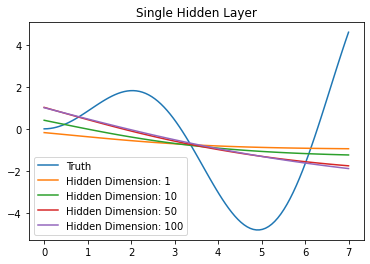

In [15]:
# plot all the networks we constructed

plt.plot(x, y, label='Truth')
for dim_to_consider, yhat in single_hidden_results.items():
    plt.plot(x, yhat, label=f'Hidden Dimension: {dim_to_consider}')
plt.title('Single Hidden Layer')
plt.legend()

In [18]:
# create a single layer neural network with Sigmoid activation function

network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, input_shape=(1,), activation='sigmoid'),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

network.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())
network.fit(x_in_batch_form, y, epochs=500, batch_size=batch_size)
network_yhat = network.predict(x_in_batch_form)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 1s 6ms/sample - loss: 6.8531
Epoch 2/100
100/100 [==============================] - 0s 25us/sample - loss: 6.5330
Epoch 3/100
100/100 [==============================] - 0s 27us/sample - loss: 6.3185
Epoch 4/100
100/100 [==============================] - 0s 30us/sample - loss: 6.2562
Epoch 5/100
100/100 [==============================] - 0s 46us/sample - loss: 6.2005
Epoch 6/100
100/100 [==============================] - 0s 61us/sample - loss: 6.1502
Epoch 7/100
100/100 [==============================] - 0s 52us/sample - loss: 6.1047
Epoch 8/100
100/100 [==============================] - 0s 50us/sample - loss: 6.0633
Epoch 9/100
100/100 [==============================] - 0s 36us/sample - loss: 6.0256
Epoch 10/100
100/100 [==============================] - 0s 49us/sample - loss: 5.9910
Epoch 11/100
100/100 [==============================] - 0s 96us/sample - loss: 5.9593
Epoch 12/100
100/100 [=====================

Epoch 96/100
100/100 [==============================] - 0s 45us/sample - loss: 5.0173
Epoch 97/100
100/100 [==============================] - 0s 34us/sample - loss: 5.0121
Epoch 98/100
100/100 [==============================] - 0s 146us/sample - loss: 5.0070
Epoch 99/100
100/100 [==============================] - 0s 68us/sample - loss: 5.0021
Epoch 100/100
100/100 [==============================] - 0s 110us/sample - loss: 4.9973


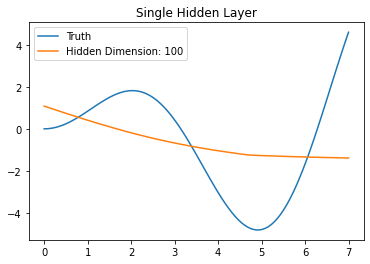

In [20]:
plt.plot(x, y, label='Truth')
plt.plot(x, network_yhat, label=f'Hidden Dimension: {dim_to_consider}')
plt.title('Single Hidden Layer')
plt.legend()

### PCA as a Linear Neural Network (Autoencoder)

In this class, we covered Principal Component Analysis in which it was introduced as a **variance-maximization algorithm**: identify the direction of highest variance in your data (the first principal component), then remove this direction from your data, identify the direction of highest variance in your altered data (the second PC) and so on.

![](../img/pca.png)

PCA can also be understood as a **data-reconstruction algorithm**, viewed in a linear neural network called an autoencoder. If you train a linear autoencoder with $K$ hidden units to reconstruct the input data, it will learn the subspace spanned by the top $K$ principal components.

![](../img/autoencoder.png)

## Rylan's Experience as a Data Scientist

Background
    - Data Scientist at Uber
    - Product Platform, Intelligent Decision Systems (IDS) Team

Team dealt with three areas:

    1. Time Series Forecasting:
        - How many riders will request rides? How many drivers will be online to accept rides?
        - For a new Uber user, how much profit should we expect for the next year?
        - For Uber's data centers, how much compute and storage will be necessary in the next year?
    2. Anomaly Detection
        - Background: Uber uses a microservices architecture
        - How can we define normal traffic/behavior for a service? How can we detect anomalies?
        - In the event that some anomaly occurs, what is its root cause?
    3. Ad Hoc Infrastructure Projects
        - How can we monitor the freshness and quality of data used for modeling?
        - Different databases have different financial and personnel costs. How can we optimize placement of data to minimize costs without impacting data scientists/analysts?
        - Maintaining and searching documentation is slow and error prone. Can we create a chat bot to accelerate finding solutions for common queries?

How is your time typically allocated?

    - Data is almost always messy, incomplete, erroneous, misleading, mixed, etc.
    - Majority of time goes into Exploratory Data Analysis (EDA) and meetings to discuss data
    - Maybe 5-10% of time is spent on modeling
    - Data science is surprisingly social and collaborative
    
What is the typical background of a data scientist?

    - On my team of ~14, we had tremendously different backgrounds
    - 1 string theory physicist
    - 1 high energy experimental physicist
    - 1 geography PhD with 10 years work experience as a research engineer/data scientist
    - 1 medical imaging physicist / time series forecasting hobbyist
    - 1 former software engineer, who made the switch after 4 years
    - 1 bioinformatics PhD, public policy Master's
    - 1 business analytics & finance Master's
    - 1 statistics Master's with work experience in finance
    - 1 industrial engineer with 20 years work experience as a software engineer/data scientist
    - 1 astrophysicist
    - 2 computer science Master's with work experience as software engineer/machine learning engineer